# Explore here

In [30]:
# Your code here
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np

url = 'https://breathecode.herokuapp.com/asset/internal-link?id=929&path=medical_insurance_cost.csv'
ds = pd.read_csv(url)
ds.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#----------------------------------
# Dimensiones y descripcion stats
#----------------------------------
print('Dimensiones: ', ds.shape)
print ('\n Descripción:\n', ds.describe())


Dimensiones:  (1338, 7)

 Descripción:
                age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [ ]:
#------------------
# Valores faltantes
#------------------

ds_null = ds.isnull().sum().sort_values(ascending = True)
print("\nValores nulos por columna:\n", ds_null)

ds.info()


Valores nulos por columna:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [22]:
#-------------------
# Valores Duplicados
#-------------------
print('Filas duplicadas :', ds.duplicated().sum())
print('Dimensiones: ', ds.shape)

Filas duplicadas : 1
Dimensiones:  (1338, 7)


In [ ]:
#----------------------
#Eliminar duplicados
#---------------------
ds.drop_duplicates(inplace=True)
print('Dimensiones: ', ds.shape)

Dimensiones:  (1337, 7)



Categóricas: ['sex', 'smoker', 'region']

Numéricas: ['age', 'bmi', 'children', 'charges']


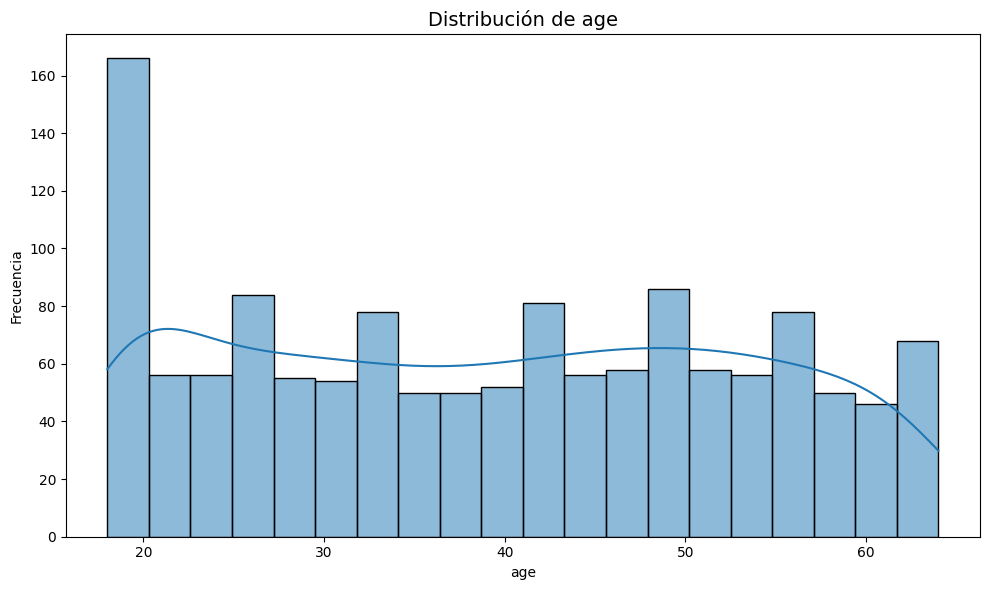

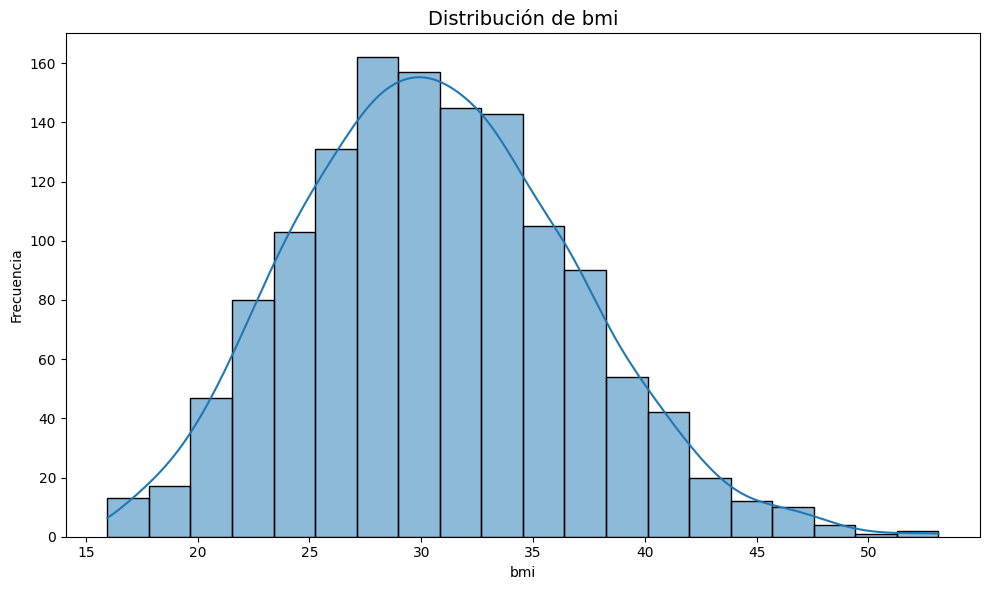

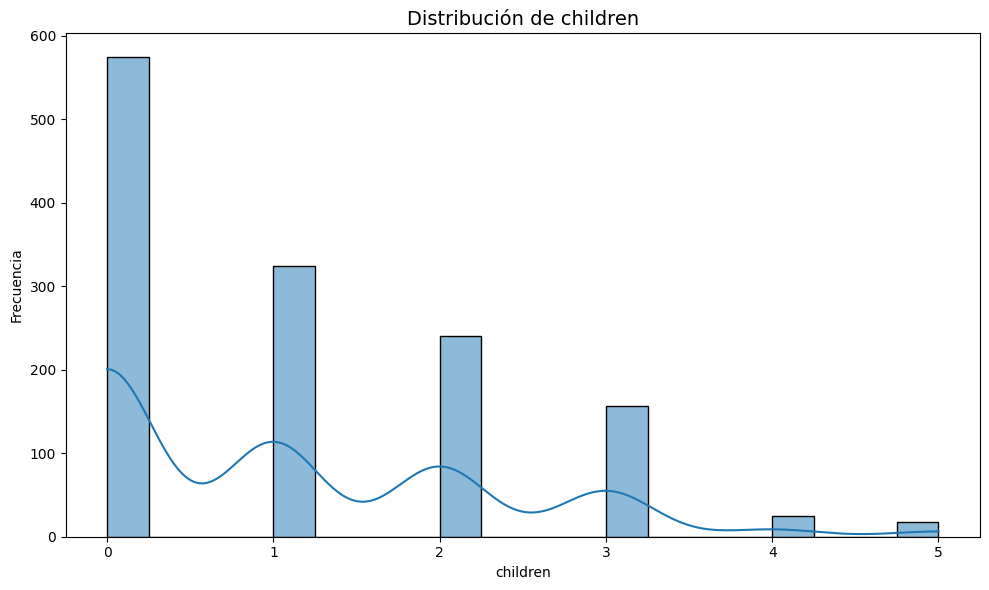

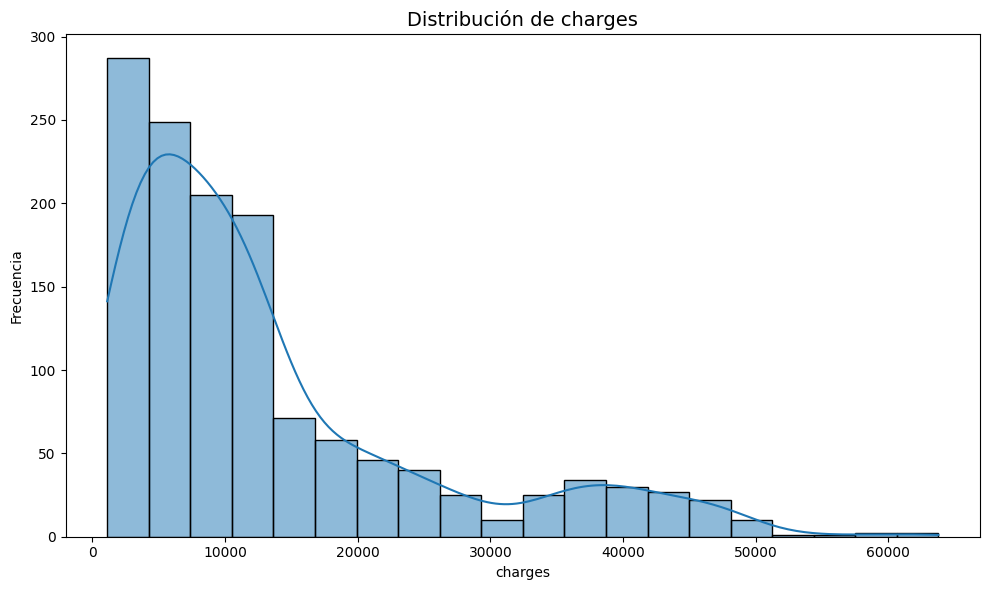

/tmp/ipykernel_6184/4140189770.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ds, x=col, palette="viridis")


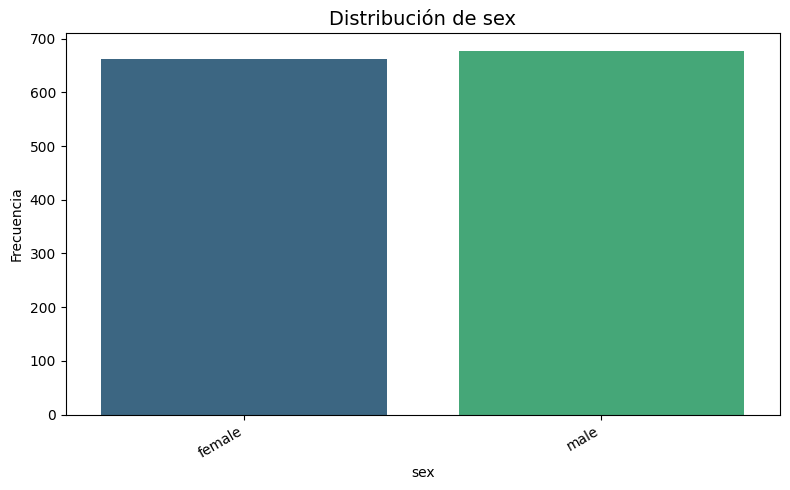

/tmp/ipykernel_6184/4140189770.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ds, x=col, palette="viridis")


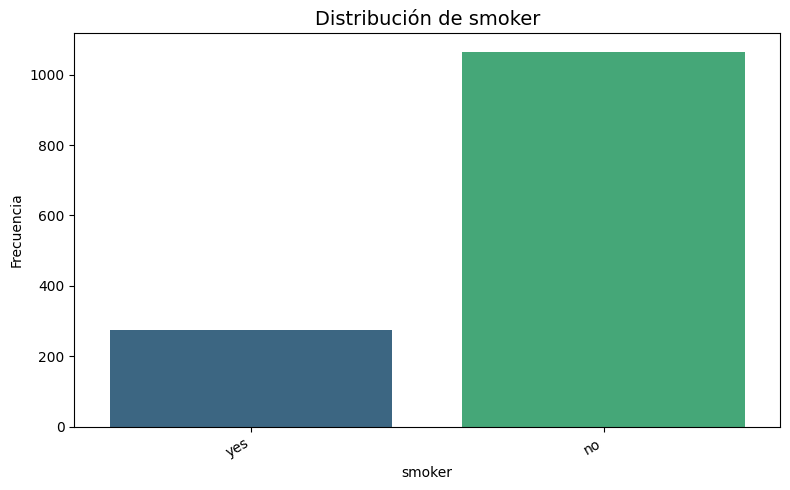

/tmp/ipykernel_6184/4140189770.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ds, x=col, palette="viridis")


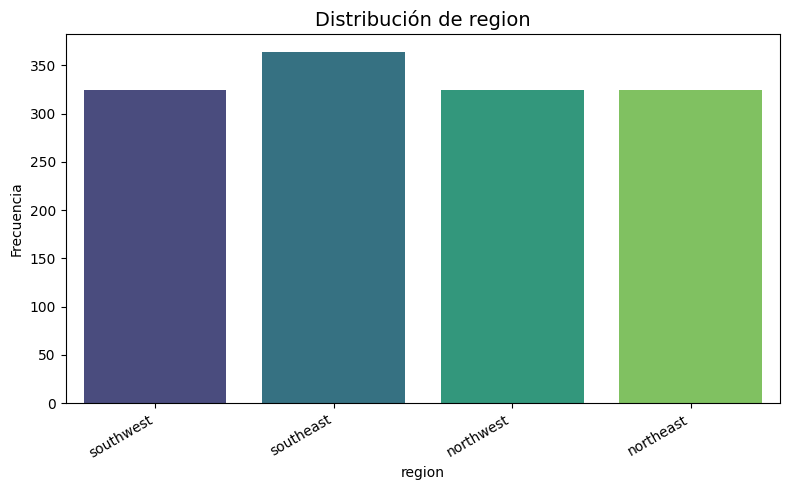

In [38]:

#------------------------
# Análisis Univariante
#------------------------

import matplotlib.pyplot as plt
import seaborn as sns

cat_cols = ds.select_dtypes(include="object").columns.tolist()
num_cols = ds.select_dtypes(exclude="object").columns.tolist()

print("\nCategóricas:", cat_cols)
print("\nNuméricas:", num_cols)

#----------------------------
# Análisis univariante numéricas
#----------------------------

for col in num_cols:
    plt.figure(figsize=(10,6))
    sns.histplot(data=ds, x=col, bins=20, kde=True)
    plt.title(f"Distribución de {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

#---------------------------------
# Análisis univariante categóricas
#---------------------------------

for col in cat_cols:
    plt.figure(figsize=(8,5))
    sns.countplot(data=ds, x=col, palette="viridis")
    plt.title(f"Distribución de {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()


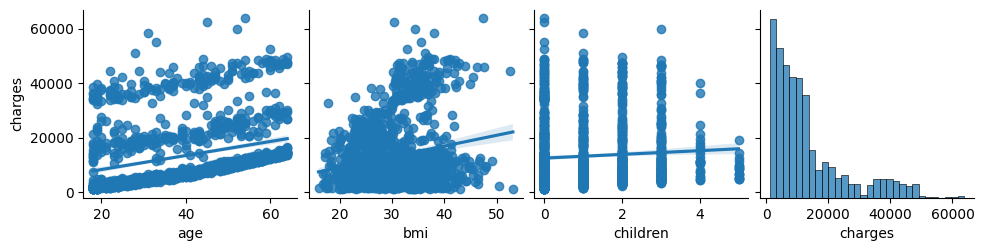

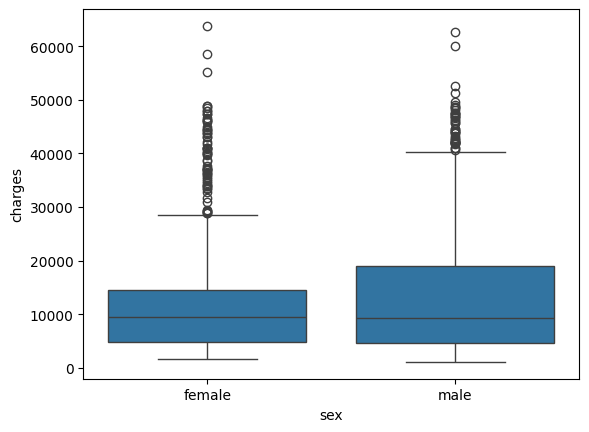

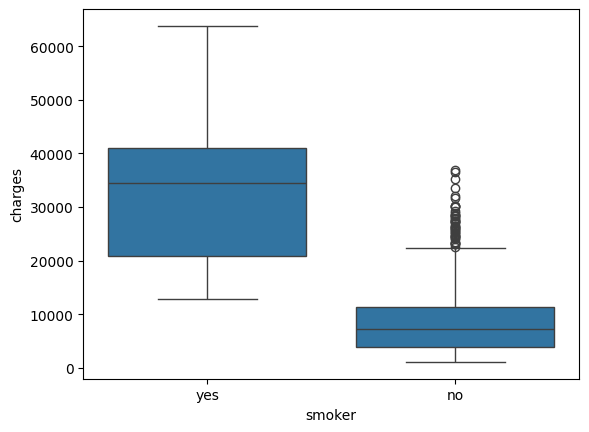

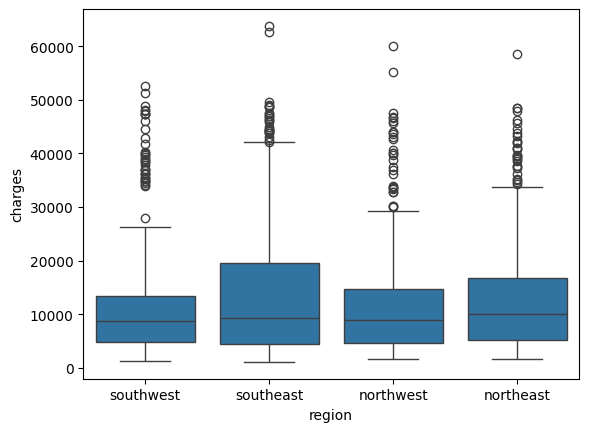

In [41]:
#----------------------
# Analisis Multivariado
#----------------------

# Numerico vs Charges
sns.pairplot(ds, x_vars=num_cols, y_vars='charges', kind='reg')
plt.show()

#Categforicas vs Charges

for col in cat_cols:
    sns.boxplot(x=col, y='charges', data=ds)
    plt.show()

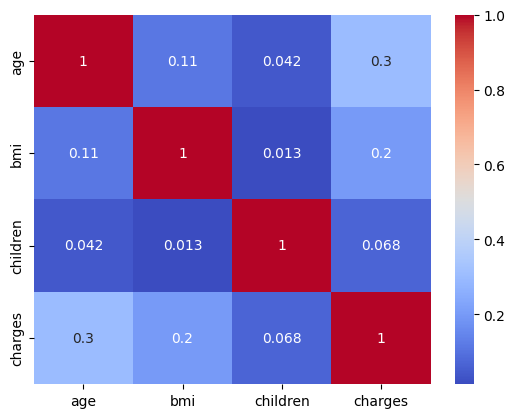

In [43]:
#Correlaciones 

sns.heatmap(ds.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

In [46]:
#--------------------------------------------------------
# Preparacion del Modelo 
#--------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Separar variables independientes y objetivo
x = ds.drop('charges',axis = 1)
y = ds['charges']

categorical = ['sex', 'smoker', 'region']
numeric = ['age', 'bmi', 'children']

#comvertir categoricas a numericas 
# Codificación one-hot
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), categorical)
], remainder='passthrough')

#Dividir la data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [49]:
#---------------------------
# Modelo Regresion Lineal
#---------------------------
import numpy as np
# Crear pipeline con preprocesador + modelo
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Entrenamiento
model.fit(x_train, y_train)

# Predicción
y_pred = model.predict(x_test)

# Evaluación
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse:.2f}")
print (f"Error medio: {rmse:.4f}")
print(f"R²: {r2:.4f}")


Error cuadrático medio (MSE): 33596915.85
Error medio: 5796.2847
R²: 0.7836
